# Customer Behavoir Analytics

Consumer behaviour is the study of how individual customers or group of customers buy, use, and dispose ideas, goods, and services to satisfy their needs and wants. (google).

So the importance of customer analytics is rising, this is because when you analyze your customers, you define who your target market is, then you can decide how you'll reach them.

Access to customer data became easier for many businesses and also customers now have accese to data  and information on similar products and contents competitors have. This makes it critical to many businesses to be able to understand and predict what their customers are likely to purchase or view.

In [1]:
# importing neccesary libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#### 1. Load Data
The data set was gotten from this link:

https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data/downloads/ibm-watson-marketing-customer-value-data.zip/1




In [2]:
data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
data.shape # the set has 9134 rows and 24 columns

(9134, 24)

In [4]:
# view the first few rows of the data to get an idea of how it looks
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

 ### 2. Analytics on Engaged Customers
This section is to analyse the set to understand how different customers behave and react to different marketing strategies.


#### 2.1 Overall Engagement Rate
The 'Respose' column contains informantion about  whether a customer responded to the marketing efforts

In [6]:
# the response column contains info about whether a customer responded
# to the marketing efforts. so we get the total number customers
# who have responded.

data.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

Text(0, 0.5, 'Count')

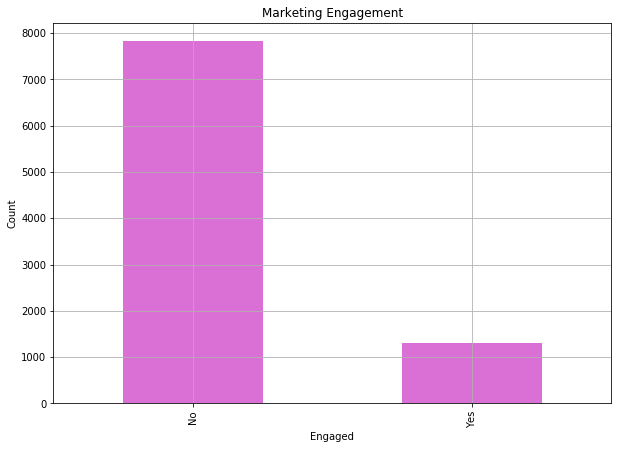

In [7]:
# Visualize this in a bar plot

ax = data.groupby('Response').count()['Customer'].plot(
    kind='bar',color='orchid',grid=True,figsize=(10,7),
    title='Marketing Engagement')

ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

In [8]:
# Calculate the percentage of the engaged and non-engaged customers
data.groupby('Response').count()['Customer']/data.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From this we can see that only about 14% of the customers responded to the marketing calls.

#### 2.2 Engagement Rates by Offer Type

The data set contains the type of renewal offer presented to the customers. This is stored in the 'Renew Offer Type' Column. In this subsection we are looking into what types of offer types worked best fot the engaged customers.

In [9]:
# Get the engagemnt rates per renewal offer type
customers_byoffer = data.loc[data['Response']=='Yes', #count only engaged customers
                            ].groupby(['Renew Offer Type'], #engaged customers grouped by renewal offer type
                                     ).count()['Customer']/data.groupby(['Renew Offer Type']).count()['Customer']

customers_byoffer

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

In [10]:
data.groupby(['Renew Offer Type']).count()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Renew Offer Type,,,,,,,,,,,,,,,,,,,,,
Offer1,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752,...,3752,3752,3752,3752,3752,3752,3752,3752,3752,3752
Offer2,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,...,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926
Offer3,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432,...,1432,1432,1432,1432,1432,1432,1432,1432,1432,1432
Offer4,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,...,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


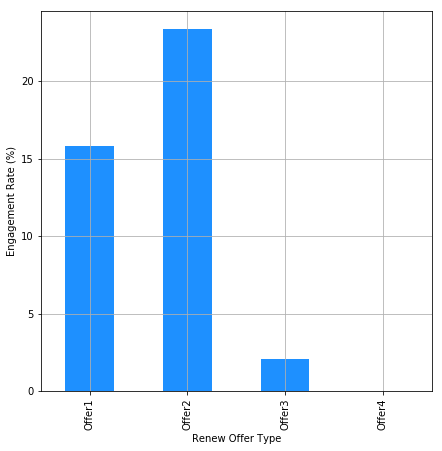

In [11]:
# Visulize it in a bar plot
ax = (customers_byoffer*100).plot(kind='bar',figsize=(7,7),color='dodgerblue',grid=True)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

From the plot above we can see that 'offer2' had the highest engagement  rate among the customers.

#### 2.3 Offer Type and Vehicle Class
We want to understand how customers with different attributes respond differently to different marketing messages.
Starting with engagements rates by offer type and vehicle class.

In [12]:
cus_byoffer_veh = data.loc[data['Response']=='Yes' #engaged customers
].groupby(['Renew Offer Type','Vehicle Class'  #rate by offer type and vehical class

]).count()['Customer'] / data.groupby('Renew Offer Type').count()['Customer'] 
#grouping the data by these two columns

cus_byoffer_veh

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [13]:
#To make the output more readable, we will use the unstack function
# to pivot the data, extract and trabsfrom the inner level groups to columns

cus_byoffer_veh = cus_byoffer_veh.unstack().fillna(0)
cus_byoffer_veh

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


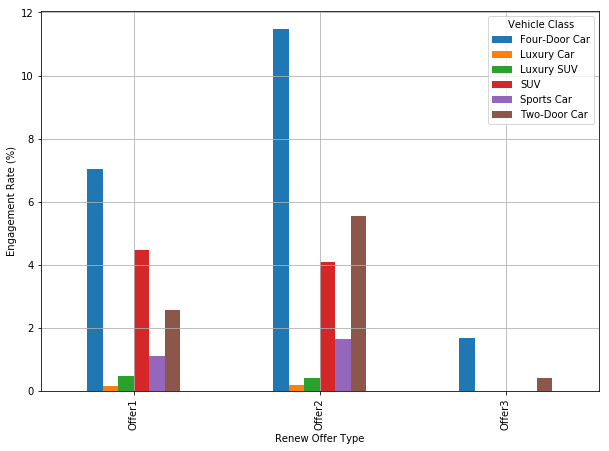

In [14]:
# Visualizing the data in a bar plot
ax = (cus_byoffer_veh*100).plot(
     kind='bar',figsize=(10,7),grid=True)
    
ax.set_ylabel('Engagement Rate (%)')

plt.show()

From the plot above, we can see that customers with Four Door Car respond more to all offer types. From the 'Engagement Rates by Offer Typr' section we know that offer 2 has the most responses. Also those with 'Luxury SUV' respond with to offer 1 more than offer 2. With this we draw insights to know which offer to present to customres based on their vehicale class.

Lastly, If we have significantly difference in the
response rates among different customer rates, we can fine-tune who to target for different set
of offers.

### 2.4 Engagement Rates by Sales Channel

This section will analyze hpw engagement rates differ by different sales channels.


In [15]:
cus_bysales = data.loc[
    data['Response']=='Yes'
].groupby(['Sales Channel'
          ]).count()['Customer'] / data.groupby('Sales Channel'
                                               ).count()['Customer']

cus_bysales

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

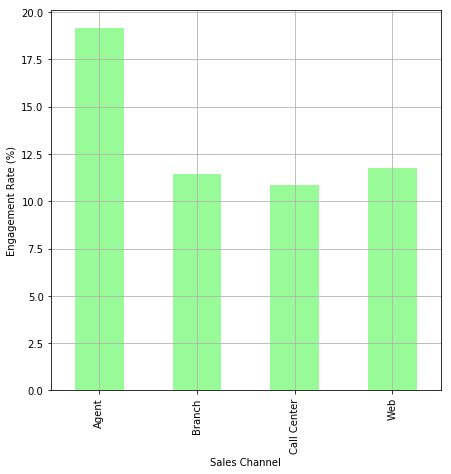

In [16]:
# Visualizing the data

ax = (cus_bysales*100).plot(kind='bar',
                            figsize=(7,7),
                            color='palegreen',grid=True)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

From the above plot, we can see that sales channels works better than forms in terms of getting responses from customers. Web sales works second best 

### 2.5 Sales Channel and Vehicle Size

In [17]:
cus_bysales_veh = data.loc[
    data['Response']=='Yes'
].groupby([
    'Sales Channel', 'Vehicle Size'
]).count()['Customer'] / data.groupby('Sales Channel').count()['Customer']

cus_bysales_veh

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [18]:
# Making it more readable

cus_bysales_veh = cus_bysales_veh.unstack().fillna(0)
cus_bysales_veh

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


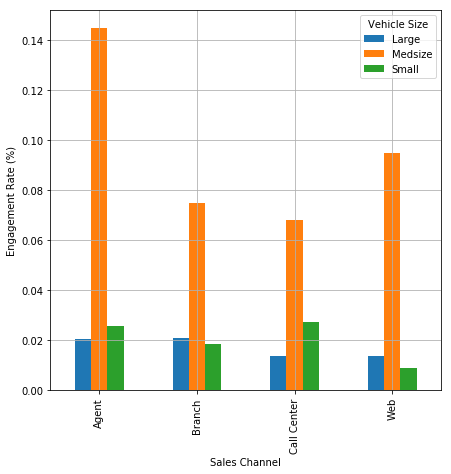

In [19]:
# Visualizing the data

ax = cus_bysales_veh.plot(kind='bar',
                figsize=(7,7),grid=True)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

From this we can see that customers with medium size vehicles respond the best to all sales channels.

#### 2.6 Engagement Rates by Months Since Policy Inception

In [20]:
cus_bymths_incept = data.loc[
    data['Response']=='Yes'].groupby(
by='Months Since Policy Inception')['Response'].count() / data.groupby(
by='Months Since Policy Inception')['Response'].count() * 100

cus_bymths_incept.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

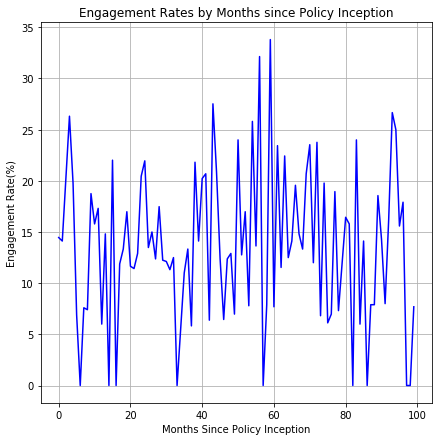

In [21]:
# making it more readable by visualizing the data

ax = cus_bymths_incept.fillna(0).plot(
                figsize=(7,7),title='Engagement Rates by Months since Policy Inception',color='blue',grid=True)
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate(%)')

plt.show()

### 3. Customer Segmentation by CLV & Months Since Policy Inception

In this section we are going to segment our customer base by Customer Lifetime Value and Months Since Policy Inception.

In [22]:
# a quick look at the distribution of CLV

data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

we are going to define those customers with a CLV higher than the median as high-CLV customers, and those with a CLV lower than the median as low-CLV customers.

In [23]:
# create a variable for this and store in the dataframe

data['CLV Segment'] = data['Customer Lifetime Value'].apply(
         lambda x: 'High' if x > data['Customer Lifetime Value'].median() else 'Low')

# Doing the same procedure for months since policy Inception

data['Months Since Policy Inception'].describe()

data['Policy Age Segment'] = data['Months Since Policy Inception'].apply(
lambda x: 'High' if x> data['Months Since Policy Inception'].median() else 'Low')



In [24]:
# Checking the data for the newly added columns
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


In [34]:
# Visualize these segments

# For High CLV and High Inception
'''
    ax = data.loc[
    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High')
].plot.scatter(ax=ax,
x='Months Since Policy Inception',
y= 'Customer Lifetime Value',
logy= True,
color='red')

# For Low CLV and High Inception
data.loc[
    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High') 
].plot.scatter(
x='Months Since Policy Inception',
y = 'Customer Lifetime Value',
logy=True,
color='blue', label = 'Low & High', ax=ax)


# For High CLV and Low Inception

ax = data.loc[
        (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'Low') 
].plot.scatter(
ax =ax,
x= 'Months Since Policy Inception',
y = 'Customer Lifetime Value',
logy=True,
color='orange')


# For Low CLV and Low Inception

ax = data.loc[
        (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'Low') 
].plot.scatter(
ax =ax,
x= 'Months Since Policy Inception',
y = 'Customer Lifetime Value',
logy=True,
color='orange',
grid=True,
figsize=(10,7))

ax.set_ylabel('CLV (In log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

'''

#you had problem with assignment, you already defined what TARGET ax is, but you kept defining each as target ax again, also, axis location set #
#was wrong for some, HH, LH, HL, LL
#you might need to read up more on how to create multiple scatter plot on one.
#i included some below

"\n    ax = data.loc[\n    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High')\n].plot.scatter(ax=ax,\nx='Months Since Policy Inception',\ny= 'Customer Lifetime Value',\nlogy= True,\ncolor='red')\n\n# For Low CLV and High Inception\ndata.loc[\n    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High') \n].plot.scatter(\nx='Months Since Policy Inception',\ny = 'Customer Lifetime Value',\nlogy=True,\ncolor='blue', label = 'Low & High', ax=ax)\n\n\n# For High CLV and Low Inception\n\nax = data.loc[\n        (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'Low') \n].plot.scatter(\nax =ax,\nx= 'Months Since Policy Inception',\ny = 'Customer Lifetime Value',\nlogy=True,\ncolor='orange')\n\n\n# For Low CLV and Low Inception\n\nax = data.loc[\n        (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'Low') \n].plot.scatter(\nax =ax,\nx= 'Months Since Policy Inception',\ny = 'Customer Lifetime Value',\nlogy=True,\ncolor='ora

### USEFUL LINKS
[this](https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas), [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) [here](https://stackoverflow.com/questions/45147454/scatter-plot-from-multiple-columns-of-a-pandas-dataframe?rq=1), [and this](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)



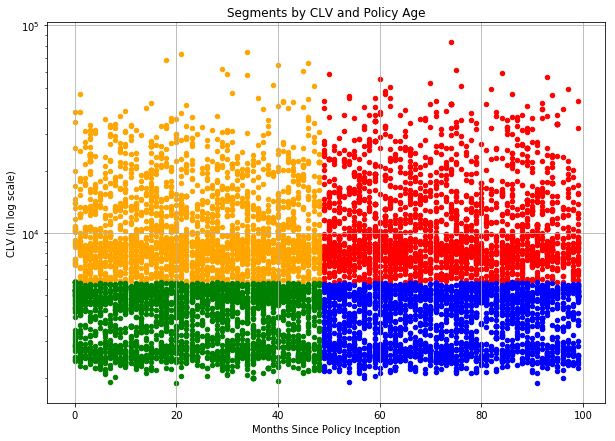

In [33]:
# Visualize these segments

# For High CLV and High Inception
ax = data.loc[
    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High')
].plot.scatter(x='Months Since Policy Inception',y='Customer Lifetime Value',logy= True,color='red')

# For Low CLV and High Inception
data.loc[
    (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'High') 
].plot.scatter(ax=ax, x='Months Since Policy Inception',y ='Customer Lifetime Value',logy=True,color='blue')

# For High CLV and Low Inception
data.loc[
        (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'Low') 
].plot.scatter(ax =ax,x= 'Months Since Policy Inception',y = 'Customer Lifetime Value',logy=True,color='orange')

# For Low CLV and Low Inception
data.loc[
    (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'Low') 
].plot.scatter(ax =ax,x= 'Months Since Policy Inception',y = 'Customer Lifetime Value',logy=True,color='green',grid=True,
figsize=(10,7))

ax.set_ylabel('CLV (In log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [26]:
# see whether there is any noticeable difference in the engagement rate among these

engagement_rates_by_segment = data.loc[data['Response']=='Yes'
].groupby(['CLV Segment','Policy Age Segment']).count()['Customer']/data.groupby([
    'CLV Segment','Policy Age Segment'
]).count()['Customer']

engagement_rates_by_segment

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

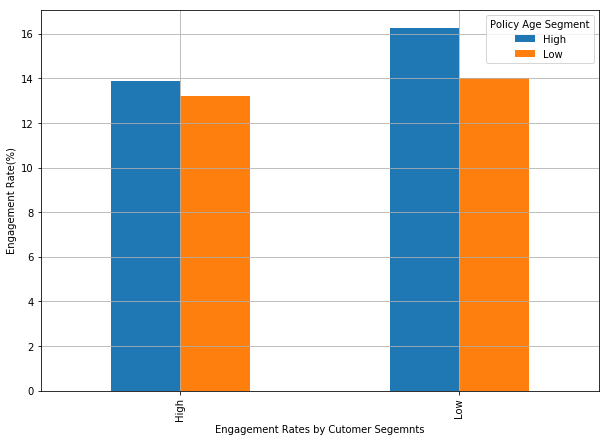

In [27]:
# visualizing these segments

ax = (engagement_rates_by_segment.unstack()*100).plot(
kind='bar',figsize=(10,7),grid=True)

ax.set_ylabel('Engagement Rate(%)')
ax.set_xlabel('Engagement Rates by Cutomer Segemnts')

plt.show()

From the plot we can notice that High Policy Age Segment has higher engagement than the Low Policy Age
Segment. This suggests that those customers who have been insured by this company longer respond better. Moreover, the High Policy Age and Low CLV segment has the highest engagement rate among the four segments.

By creating different customer segments based on customer attributes, we can better understand how different groups of customers behave differently.